Bir NLP projesinde kullanacağımız verinin kaynağı herhangi bir yer olabilir. Kitaplar, Twitter'daki insanların yazdığı tweetler, bir forum sitesinde paylaşılanlar... Herhangi bir yer. Bu ham haldeki; hiç işlenmemiş ve herhangi bir düzene oturtulmamış haldeki veriye, NLP özelinde genelde "corpus" (derlem/külliyat) denir. Ne tür bir NLP uygulamasıyla uğraşıyor olursak olalım, ilk olarak bu corpuslar üzerinde bir text preprocessingi yapmak genelde yapmamız gereken ilk şeydir. Text preprocessingden kasıt, elimizdeki veriyi işlenebilecek hale getirmek, veriyi hazırlamaktır. Şimdi bunlardan bahsedeceğiz, ilk olarak tokenization işlemiyle başlayalım:

## Tokenization

Tokenization işlemi, text preprocessing işlemlerinde genelde ilk olarak uygulanan işlemdir ve aslında basitçe elimizdeki veriyi kelimelere bölmektir. Yani şöyle, bir doküman alırız, bu dokümanı cümlelere böleriz, sonra bu cümleleri de kelimeler, sayılar, noktalama işaretleri haline getiririz. İşte bu parçalanmış haldeki verinin her bir parçasına token, bu işlemeyse tokenization diyoruz.

In [ ]:
"He didn't want to pay $20 for the book.".split()

Görüldüğü üzere Python'da bu işlemi gerçekleştirmek oldukça kolay. Fakat tabii bazı sorunlar var, örneğin $ sembolünü sayıdan ayırmak isteyebiliriz ya da son kelimedeki nokta işaretini oradan ayırmak isteriz (çünkü oradaki noktanın birleştiği kelimeyle bir alakası yok, oradaki tek görevi cümlenin bitişini göstermek). Tek sorun bunlar olsaydı bu sorunları belki regular expressionlar (bilmiyorsanız önemli değil) kullanarak çözebilirdik ama maalesef durum böyle değil.

Yukarıdaki örnek İngilizce'den bir örnek fakat mesela şu örneğe bakalım:

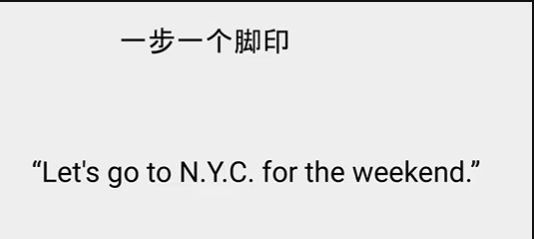

Tokenization işlemini gerçekleştirmek için cümleyi boşluk karakterine göre parçalamak tabii ki kolay ama Çince gibi dillerde boşluk yok, dolayısıyla bunları öyle kolayca parçalayamayız. Bunun dışında yukarıda mesela noktanın da ayrılmasını istediğimizi söyledik ama bu örneğe baktığımızda N.Y.C. ifadesi bir kısaltma ve buradaki noktaların ayrılmasını istemeyiz, çünkü bu durumda noktalar kelimenin bir parçası oluyor.

Tabii bu kadarla da sınırlı kalmıyor. örneğin "full moon" ifadesindeki kelimeleri birbirinden ayırmalı mıyız ayırmamalı mıyız? Çünkü ikisi ayrı birer kelime olsalar da asıl ifade beraber olduklarında ortaya çıkıyor. Ya da "don't" gibi kısaltma ifadeleri "do not" şeklinde mi almalıyız ya da ne yapmalıyız?

Neyse bu sorulara girmeden önce ilk olarak "kelime (word)" dediğimiz şeyin ne olduğunun bir tanımını yapalım. 

- Kelime, bir dilde, kendi başına bir anlamı olan en küçük birimdir. Bununla alakalı 2 konsept daha vardır:
- Morpheme (Biçimbirim): Bir dilde, manası olan fakat kendi başına olmayan en küçük birimdir. İngilizce için -ing, re-, pre-, un- gibi.
- Grapheme (Yazıbirim): Bir yazı sistemindeki en küçük işlevsel birimdir. İngilizcede bunlar harflerdir. Örneğin Japoncada da heceleri görürüz.

(Bu kavramları ezberlemenize falan gerek yok)

Her neyse, preprocessing işlemlerimizin ilk adımı olan tokenizationla alakalı problemlerden bahsettik ve bir şekilde bunları çözmemiz gerekiyor, daha en baştan öyle çöküp kalmamak lazım. tüm bu sorunları kapsayan ve her şeyi çözüme kavuşturan bir şeyler yazmakla uğraşabilirdik tabii ama neyse ki bu durumların üstesinden gelen spacy gibi bazı kütüphaneler var. Şimdi bu kütüphanenin bazı kullanım şekillerini göstereceğim fakat burada şu notu düşmem gerekiyor: Asıl meselemiz kütüphaneler değil, kütüphaneleri "ezberlemeye" çalışmayacağız. Çünkü "var olan her şey" için çalışan bir kütüphane yok. Elimizde bir iş olacak, bu iş için kullanılabilecek kütüphaneleri araştırıp deneyeceğiz, gerekirse biz de üstüne bir şeyler ekleyeceğiz ya da sıfırdan geliştireceğiz ve sonrasında işi tamamlayacağız. Süreç hep bu şekildedir. Kütüphaneler amaç değil araçtır.

Şimdi spacy'e dönelim ve ilk olarak kurulumuyla başlayalım:

In [ ]:
!pip install spacy==3.8.2

Sonrasında kurulum olmuş mu diye bi kontrol ediyoruz:

In [ ]:
!python -m spacy info

Sonrasında üzerinde çalışma yapacağımız dil için (İngilizce) bir istatistiksel dil modeli indiriyoruz. Bu model içerisinde tokenizationla alakalı kurallar bulunuyor. Ayrıca sözcük türleriyle, cümle yapılarıyla vs de alakalı bilgi içeriyor. Detaylar sonra:

In [ ]:
!python -m spacy download en_core_web_sm

Artık kütüphaneyi kullanmaya başlayabiliriz:

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en_core_web_sm') # english core web small

Yüklediğimiz bu İngilizce dil modeli, OntoNotes 5 isimli etiketlenmiş bir corpus üzerinde eğitilmiştir. Bu corpus içerisinde haberler, blog yazıları, belgeler vs bulunmaktadır. Kısaca söylemek gerekirse, böyle bazı dokümanlar toplanmış bir araya getirilmiş ve işte cümlelerin nasıl bölünmesi gerektiğiyle alakalı bilgiler, verilen bir kelime isim midir sıfat mıdır ya da başka bi şey midir bunun bilgisi, verilen bi kelime bi insan adı mıdır ya da bi organizasyon ismi midir ya da başka bi şey midir bunun bilgisi ve bazı işte dille alakalı diğer bilgiler corpus üzerinde etiketlenmiş. Sonrasında da bu etiketler kullanılarak model eğitilmiş.
Detaylar: https://catalog.ldc.upenn.edu/LDC2013T19

spacy modelleriyle alakalı:
https://spacy.io/models
https://spacy.io/usage/models

Modeli yükledikten sonra, "nlp" değişkeni Language classından bir instance olacaktır ve işte bu class içerisinde de yukarıda saydığımız dille alakalı bilgiler mevcuttur.

In [ ]:
type(nlp)

Örnek bir cümleyle başlayalım:

In [ ]:
s = "He didn't want to pay $20 for this book."
doc = nlp(s)

In [ ]:
type(doc)

Hangi text ile işlem yapmak istiyorsak bunu nlp nesnesinin içerisine veriyoruz. Sonrasında bu nesne bize bir Doc nesnesi veriyor. Bu nesnenin içerisindeki text ise tokenize edilmiş oluyor ve her bir token için yine başka bilgiler (annotation) de içeriyor, bunların ne olduğunu ileride göreceğiz. Doc nesnesiyle alakalı daha detaylı bilgi için:
https://spacy.io/api/doc

doc nesnesini printlemeye kalktığımızda verdiğimiz cümlenin doğrudan aynısını görürüz fakat bu sadece görünürde böyle. Bu nesne, diğer bilgileri içerisinde saklıyor:

In [ ]:
print(doc)

Örneğin doc nesnesi üzerinde iterate edip tokenları görüntüleyebiliriz:

In [ ]:
print([t.text for t in doc])

Burada şu noktalara dikkat edelim:

- "didn't" kelimesi "did" ve "n't" olarak ayrılmış.
- Dolar işareti sayıdan ayrılmış.
- Cümle sonundaki nokta işareti tek başına bir token olmuş.

Doc nesnesi tıpkı bildiğimiz Python listeleri gibi indekslenebilirler ve bölünebilirler (slicing). Doc nesnesi içerisinde Token ve Span nesneleri vardır, ki bunlar da ilgili text hakkında bize farklı bakış açıları sunar. şimdi bu dediklerimizi de görelim:

In [ ]:
# İstediğimiz bir tokena indeks değeriyle ulaşabiliriz:
print(doc[0])

In [ ]:
# Doc nesnesinin Token ve Span nesnelerini kapsadığını söylemiştik:
print("doc[0]: ", doc[0])
print("Type doc[0]: ", type(doc[0]))
print("doc[0:3]: ", doc[0:3])
print("Type doc[0:3]: ", type(doc[0:3]))

Görüldüğü üzere bi doc nesnesini sliceladığımızda Span nesnesi elde ediyoruz. Aynı zamanda bir tokenın cümledeki indeksine i attributeunu kullanarak erişebiliriz:

In [ ]:
for token in doc:
    print(f"Text: {token.text} || Index: {token.i}")

Bir başka not olarak, spacy'nin tokenization işlemi non-destructivedir. Yani, orijinal cümle elde edilen tokenlar kullanılarak yeniden oluşturulabilir. Kısaca şöyle de yapabiliriz:

In [ ]:
print(doc.text)

Token ve Span nesneleri hakkında daha fazla bilgi için:  
https://spacy.io/api/token  
https://spacy.io/api/span

Bu arada, illa bi cümleyi tokenize etmekle sınırlı da değiliz. İstersek paragraflara hatta dokümanların tamamına bunu yapabiliriz. Bu şekilde birden fazla cümle içeren metinleri tokenize ettiğimizde de Doc nesnesinin _sents_ propertysini kullanarak cümlelere ulaşabiliriz:

In [ ]:
s = """Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs."""

doc = nlp(s)

for index, sentence in enumerate(doc.sents):
    print(f"\033[93mSENTENCE NO:\033[0m \033[96m{index+1}\033[0m || \033[93mSENTENCE CONTENT:\033[0m \033[96m{sentence}\033[0m")

# list-comprehension kullanarak printlemek isteyen havalı çocuklar aşağıdaki satırı kullanabilir
# print([sent for sent in doc.sents])

Bazı alıştırmalar:

In [ ]:
# 1) Aşağıdaki texti tokenize et
# 2) Tokenlar içerisinde para birimi sembolü var mı yok mu kontrol et
# 3) Varsa ve eğer peşinden bir sayı geliyorsa, sembolü ve sayıyı yazdır (ör. $20 şeklinde)

# https://spacy.io/api/token#attributes adresinden yardım alınabilir

s = "He didn't want to pay $20 for this book."

In [ ]:
# Tokenizasyon
doc = nlp(s)
print([t.text for t in doc])

In [ ]:
# Token bir para birimiyse tokenı ve indexini printle
for token in doc:
    if token.is_currency:
        print(token.text, token.i)

# havalı çocuklar için list comprehensionlu hali:
# print([(t.text, t.i) for t in doc if t.is_currency])

In [ ]:
# 6. index para birimi olduğuna göre sonrasında gelen indexteki (7. indexteki) token da sayıysa, bunları beraber alabiliriz:
if(doc[7].like_num):
    print(doc[6:8])

Ayrıca bu adresten spacy kursuna ulaşılabilir: https://spacy.io/usage/spacy-101

Şimdi bir de nltk kütüphanesini kuralım:

In [ ]:
pip install nltk==3.9.91

Aşağıdaki cümlenin NLTK kütüphanesiyle nasıl tokenize edileceğini kontrol et. N.Y.C. kısaltmasını iyi ayırabiliyor mu bak:

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
s = "Let's go to N.Y.C. for the weekend."

In [ ]:
nltk_tokenizer = TreebankWordTokenizer()
print(nltk_tokenizer.tokenize(s))

spacy'le de yapalım:

In [ ]:
doc = nlp(s)
print([t.text for t in doc])

Bir not olarak, farklı tokenizerlar bağlı oldukları kurallara göre farklı sonuçlar verebilirler. Bu noktada hangi tokenizerın projeye daha uygun olduğunu seçmek bize düşüyor.

## Basic Preprocessing

### Case Folding

Tokenization işlemiyle beraber, corpusu daha temiz hale getirme sürecindeki ilk adımı atmış olduk. şimdi birkaç yaygın olarak kullanılan temel preprocessing yöntemi daha göreceğiz. sıradaki konumuz case folding olacak.

Case folding, aslında çok basitçe bi textteki tüm karakterleri küçük ya da büyük hale getirmektir. Pekiii neden böyle bir şey yaptık şimdi göreceğiz.

Bir corpusu tokenize ederek kendimize bir vocabulary oluştururuz. Vocabulary dediğimiz şey, corpus içerisinde bulunan tüm eşsiz/özgün (unique) tokenlardır. Yani şöyle, diyelim ki tüm corpus içerisinde 10 defa "tavşan" kelimesi kullanıldı. O zaman vocabulary içerisine "tavşan" kelimesinin corpus içerisinde var olduğunu belirtmek için vocabulary'e 1 tane "tavşan" yerleştiriyoruz. Zaten "vocabulary" kelimesinin anlamı da "sözcük dağarcığı" demek. Yani işte hangi tokenlar kullanıldıysa (kaç defa kullanıldıkları fark etmeden) vocabularye kaydedilir. (Unique kelimesini her Türkçeye çevirmeye çalıştığımda böyle sıkıntı yaşıyorum anlaşılır olup olmadığına dair ama anlaşıldığını umuyorum...)

Case folding yaptığımızdaysa bu işlem hem vocabularyi, hem devamında gelecek işlemleri etkiler. Bir örnekle görmek daha iyi olur, önce cümleyi case folding yapmadan görelim:

"Aslı Hanım sadece işin aslı neyse onu bilmek istiyor."

Bu cümleyi tokenize ettiğimizde şöyle bir vocabulary elde etmeyi bekleriz:  
 ["Aslı", "Hanım", "sadece", "işin", "aslı", "neyse", "onu", "bilmek", "istiyor", "."]

Görüldüğü üzere "aslı" kelimesi "Aslı" ve "aslı" olarak iki defa geçiyor, çünkü bu iki kelime birbirleriyle tıpa tıp aynı şekilde yazılmadığı için farklı kelimeler şeklinde değerlendiriliyor - ki aslında bu örnekte bizim için de öyle.

Case folding uygulasaydık elde edeceğimiz vocabulary şu şekilde olurdu:  
["aslı", "hanım", "sadece", "işin", "neyse", "onu", "bilmek", "istiyor", "."]

Görüldüğü üzere bu noktada iki "aslı" kelimesi de birleşti ve tek bir kelime haline geldi. Yani tabii evet biraz zorlama bir örnek gibi gelmiş de olabilir ve "ne elde ettik şimdi biz?" diye sorulabilir de. Şöyle ki, case folding uyguladığımızda vocabulary daha küçük olacağı için kullanacağımız hafıza ve işlem gücünden tasarruf ediyoruz ve bu "recall"u arttırabilir. Fakat aslında genelde text preprocessing adımlarında case folding işlemi uygulanmaz. Çünkü, kaybettiğimiz/yok ettiğimiz bu kelimeler aslında bilgi kaybına yol açıyor. Yani "Aslı Hanım"daki "aslı"yla "işin aslı"ndaki "aslı" birbirinden çok ama çok farklı şeyler, cümlede bi insandan bahsedildiği bilgisi bile doğrudan yok oluyor. Dolayısıyla sonuçların daha kötü çıkmasına yol açabiliyor ve "precision"ı düşürüyor. Recall ve precision hakkında daha çok bilgi sahibi olmak isterseniz ufak bir aramayla bulabilirsiniz. Doğrudan NLP içerisindeki kavramlar olmadığı için şimdilik onları geçiyorum.


Ya da dur ya geçemedim. Hızlıca iki örnek üzerinden anlatmaya çalışacağım. Öncelikle, precision ve recall dediğimiz şeyler bir modelin performansını ölçmek için kullanılan iki metrik.

Precisionı yüksek sistemlere örnek olarak spam mailleri tespit eden modelleri verebiliriz. "Precision" anlam olarak "hassasiyet/kesinlik" demek zaten. Yani şöyle oluyor, model elinden geldiğince gerçekten ama gerçekten spam olduğuna emin olduğu mailleri spam olarak işaretliyor. Çünkü bu kadar emin olmadan bir şeyler işaretlerse, arada bizim için önemli olan mailler de kayıp gidebilir ki bu istenen bir şey değildir.

Bu örnek üzerinden gidecek olursak precision formülü şu şekilde:

$$ {\color{orange}{\text{Model tarafından spam olarak işaretlenen ve gerçekten de spam olan mail sayısı}} \over \color{orange}{\text{Gerçekten spam olan mail sayısı + Spam olmadığı halde spam olarak işaretlenen mail sayısı}}} $$

Fakat elimizdeki probleme göre precisiondan ziyade recall'u daha göz önünde tutmak isteyebiliriz. Recallun olayı ise model elinden geldiğince tüm olası durumları bulmaya çalışıyor. Örneğin bir bankanın transferleri üzerinde çalışan bir model düşünelim ve bu modelin amacı "dolandırıcılık amacı taşıyan" transferleri bulmak olsun. Bu durumda elimizden geldiğince çok dolandırıcılığı tespit etmek isteriz, kesinliğine çok takılmayız. Mazallah bankamız zarar marar eder (etmez şerefsizler).


Bu örnek üzerinden gidecek olursak recall formülü şu şekilde:

$$ {\color{orange}{\text{Dolandırıcılık amacı taşıyan ve model tarafından tespit edilen transfer sayısı}} \over \color{orange}{\text{Dolandırıcılık amacı taşıyan ve model tarafından tespit edilen transfer sayısı + Model tarafından tespit edilemeyen dolandırıcılık sayısı}}} $$


### Stop Wordlerin Temizlenmesi

Stop wordler, oldukça sıkça karşımıza çıkan fakat nadiren bilgi içeren kelimelerdir. İngilizce için düşünecek olursak "a, an, the, of, this, that" vs gibi kelimeleri örnek verebiliriz. Case foldingde olduğu gibi, stop wordlerin temizlenmesi işleminde de vocabulary büyüklüğünü düşürüp hafıza ve işlem gücü açısından verimlilik sağlayabiliriz fakat yine bu yöntemi kullanıp kullanmamamız gerektiğini elimizdeki işe göre kendimiz seçmeliyiz.

Örneğin, "topic modelling" görevi için stop word removal işlemini bir görmeyi deneyelim. Daha önce topic modelling kavramıyla karşılaşmamış olabilirsiniz, normaldir üzülmeyin hemen açıklayalım: Topic modelling, verilen bir corpus içerisindeki farklı "konu başlıkları"nı otomatik olarak bulma işidir - adından da belli zaten. Örneğe geçelim, şöyle bi yazı olsun elimizde:

"Python was created in late 1980s, and first released in 1991, by Guido van Rossum as a successor to the ABC programming language. Python 2.0, released in 2000, introduced new features, such as list comprehensions, and a garbage collection system with reference counting, and was discontinued with version 2.7 in 2020. Python 3.0, released in 2008, was a major revision of the language that is not completely backward-compatible and much Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x and later are supported, with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows)."

Şimdi bu yazıdan stop wordleri çıkaralım:

"Python created late 1980s, released 1991, Guido van Rossum successor ABC programming language. Python 2.0, released 2000, introduced features, list comprehensions, garbage collection system reference counting, discontinued version 2.7 2020. Python 3.0, released 2008, major revision language completely backward-compatible Python 2 code unmodified on Python 3. With Python 2's --, Python 3.6.x supported, older versions supporting e.g. Windows 7 (old installers restricted 64- Windows)."

Görüldüğü üzere, stop wordleri çıkardıktan sonra bile yazının hala Python'la alakalı bir yazı olduğunu anlayabiliyoruz. Dolayısıyla, stop wordlerin çok da önemli olmadığı görevlerde silinmelerinde bir sorun yoktur ve yardımı da dokunabilir.

Fakat, başka görevler için bu durum tabii ki geçerli olmayabilir, özellikle de cümlede anlatılan bağlamın önemli olduğu görevlerde. Örneğin "duygu analizi" (sentiment analysis) görevlerinde. Örneğin, bir cümlenin pozitif mi negatif mi olduğuna karar vermeye çalışıyoruz diyelim:

"I saw the movie last night. I was not amused." Stop wordleri sildiğimizde:
"Saw movie night. amused."

Görüldüğü üzere mana tamamen tersine dönüyor. Bu arada, gösterdiğimiz bu örneklerdeki stop wordlerin temizlenmesi işlemi spacy'nin stop word listesine göre gerçekleştirilmiştir. Böyle evrensel bir "şunlar stop wordlerdir" şeklinde kural yok ortada. Farklı kütüphaneler farklı şeyleri stop word olarak kabul edebilir yani hatta kendimiz de kendimize ait stop word listesi oluşturup kullanabiliriz.

### Stemming

Şimdiki yöntemimiz ise, stemming. Kelimelerin aldığı ekleri veya ön ekleri ortadan kaldırma işlemine stemming diyoruz. Örneğin "banking" ve "banks" kelimelerine stemming uyguladığımızda her ikisi de "bank" kelimesine dönüşür. Bu işlemin gerçekleştirilmesi tabii bazı kurallar dizisine bağlıdır bir algoritması vardır ve bu algoritmaların en yaygın olanı Porter stemmerdır (Porter's algorithm). Bu noktada, unutulmamalıdır ki, stemming işleminden geçen bir kelimeden elde edilen sonuç illa düzgün bir kelime olmak zorunda değildir. Örneğin, "analysis" kelimesine stemming uyguladığımızda "analysi" şeklinde bir kelime elde ederiz. Dediğimiz gibi, bunun sebebi stemming işleminin bazı önceden tanımlanmış kurallara bağlı olarak gerçekleştiriliyor olmasıdır.

Bu noktada, klasik sorumuzu soralım. "Stemming kullanmalı mıyız?" Tıpkı diğer yöntemlerde olduğu gibi stemming işlemi de vocabulary boyutunu düşürür ve modeli, aynı stem'e sahip kelimeler için aynı şekilde davranmasını sağlayacak şekilde genelleştirir. Aynı zamanda mevcuttaki vocabularyde var olmayan, yeni kelimeler için de yardımcı olabilir (bunun sebebi, yeni gelen kelimenin stemlenmiş hali daha önceden vocabularye eklenmiş olabilir). Negatif noktalarına gelecek olursak, stemmerlar kelimeyi fazladan stem edebilirler. Örneğin "university" kelimesi "universe" veya "univers" kelimelerine dönüşebilir. Ya da yeteri kadar stem edemeyebilirler, örneğin "alumnus" ve "alumni" kelimeleri, "alumnu" ve "alumni"ye dönüşür. Ki bu da iyi sonuçlar elde etmemizi engellemiş olur.

Sonuca gelecek olursak, stemming işlemi günümüzde artık oldukça nadiren kullanılıyor. Hem zaten stemming yerine kullanılabilecek daha iyi bir alternatif de var:

### Lemmatization

Lemmatization işlemi, kelimeyi "lemma"sına "düşürmeyi" sağlar - bir başka deyişle "sözlük formu"na dönüşmesini sağlar da diyebiliriz. Şimdi böyle söyleyince stemmingle aynı gibi görünebilir hani ne farkı var o zaman diye düşünebiliriz. Stemming işleminde, ekleri ve ön ekleri silmek için bazı önceden tanımlanmış kurallar katı şekilde uygulanır fakat bu sırada "eş anlam", "zaman kipi" ya da kelime bir isim mi fiil mi vs bunların hiçbiri göz önüne alınmaz. Lemmatizorlar ise bunu yapar. Örneğin "did", "done" ve "doing" kelimelerine lemmatization uyguladığımızda hepsinden de ayrı ayrı "do" sonucunu elde ederiz. Stemmerların aksine lemmatizorlar daha böyle incelikli şekilde hareket eder ve bir kelimenin isim mi fiil mi vs olduğunu da göz önüne alır. Örneğin:

"talkative" ----lemmatizer---> "talkative"
"talkative" ----stemmer---> "talk"

Görüldüğü üzere talkative kelimesine dokunmamıştır çünkü bu kelime bir sıfat olarak var olmaktadır ve "talk" haline dönüştürülürse o sıfat özelliği kaybolacaktır. Ama görüldüğü üzere stemmer hiç acımaz.

Neyse, lemmatization işleminin avantajlarına gelecek olursak, aslında bu açıdan stemminge benzerler fakat stemmerlara göre çok daha iyi çalışırlar ve genelde daha çok tercih edilirler. spacy kütüphanesi içerisinde lemmetization desteklenirken stemming işlemi desteklenmemektedir. Olumsuz yanına gelecek olursak ise, lemmatization işlemi biraz zararlı bir işlem de olabilir. Örneğin yukarıda gösterdiğimiz gibi "did"i "do"ya çevirdi ama eğer buradaki zaman kipi bilgisi işimiz için gerekli bir bilgiyse, lemmatize etmek istemeyiz. Buna ek olarak çok daha böyle incelikli çalıştığı için stemminge oranla daha fazla kaynak gerektirir.

### Alıştırmalar

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
s = "He told Dr. Lovato that he was done with the tests and would post the results shortly."
doc = nlp(s)

In [ ]:
# case-folding
print([t.lower_ for t in doc])

In [ ]:
# farklı şartlar da ekleyebiliriz. örneğin bir kelime cümlenin ilk kelimesiyse case folding yapmamasını söyleyebiliriz:
print([t.lower_ if not t.is_sent_start else t for t in doc])

In [ ]:
# stop word removal
# spacy's default stop word list:
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

In [ ]:
# stop wordleri dahil etmezsek:
print([t for t in doc if not t.is_stop])

In [ ]:
# lemma dönüşümleri
[(t.text, t.lemma_) for t in doc]

spacy içerisinde stemmer olmadığı için nltk kullanarak onu da yapalım:

In [ ]:
from nltk.stem.snowball import SnowballStemmer
s = "He told Dr. Lovato that he was done with the tests and would post the results shortly."

snow_stemmer = SnowballStemmer(language="english")
nlp = spacy.load("en_core_web_sm")
doc = nlp(s)

tokenized_words = [t.text for t in doc]
stemmed_words = [snow_stemmer.stem(word) for word in tokenized_words]
print(list(zip(tokenized_words, stemmed_words)))

In [ ]:
# 'told' kelimesini stop word olarak ekle ve çalışıyor mu diye bak
# sonra bu kelimeyi stop word listesinden sil

import spacy
s = "He told Dr. Lovato that he was done with the tests and would post the results shortly."
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("told")
nlp.vocab["told"].is_stop = True
doc = nlp(s)
print(' '.join([t.text for t in doc if not t.is_stop]))
nlp.vocab["told"].is_stop = False
nlp.Defaults.stop_words.remove("told")